<a href="https://colab.research.google.com/github/jesuselizondo/Inteligencia-Artificial-y-Redes-Neuronales/blob/main/AF8_RNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **# Actividad 8: Redes Neuronales Convolucionales**

In [ ]:
# Zaira Villalobos García 2132006
# Nestor Alejandro Jimenez Barragan 2132189
# Emiliano Javier Elizondo Castillo 2058628
# Jesús Adrian Saucedo Elizondo 2062669
# Carlos Emilio Marrero Herrera 1928023

# IMPORTACION DE BIBLIOTECAS y CARGA DE DATOS
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# PROCESAMIENTO DE DATOS
train_images = x_train.reshape((60_000, 28, 28))
train_images = train_images.astype('float32') / 255

test_images = x_test.reshape((10_000, 28, 28))
test_images = test_images.astype('float32') / 255

In [ ]:
# DISEÑO DEL MODELO CONV.
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(46, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(78, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# COMPILACION DEL MODELO
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# ENTRENAMIENTO
history = model.fit(
    train_images, y_train,
    epochs=10,
    validation_data=(test_images, y_test)  # <-- Esto es clave
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9066 - loss: 0.2944 - val_accuracy: 0.9814 - val_loss: 0.0579
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9861 - loss: 0.0439 - val_accuracy: 0.9877 - val_loss: 0.0364
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9910 - loss: 0.0281 - val_accuracy: 0.9917 - val_loss: 0.0263
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9936 - loss: 0.0195 - val_accuracy: 0.9912 - val_loss: 0.0289
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9950 - loss: 0.0170 - val_accuracy: 0.9895 - val_loss: 0.0348
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9963 - loss: 0.0116 - val_accuracy: 0.9911 - val_loss: 0.0302
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9976 - loss: 0.0079 - val_accuracy: 0.9905 - val_loss: 0.0376
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9965 - loss: 0.00

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9889 - loss: 0.0555
Exactitud: 0.9912999868392944
Perdida: 0.04407647252082825


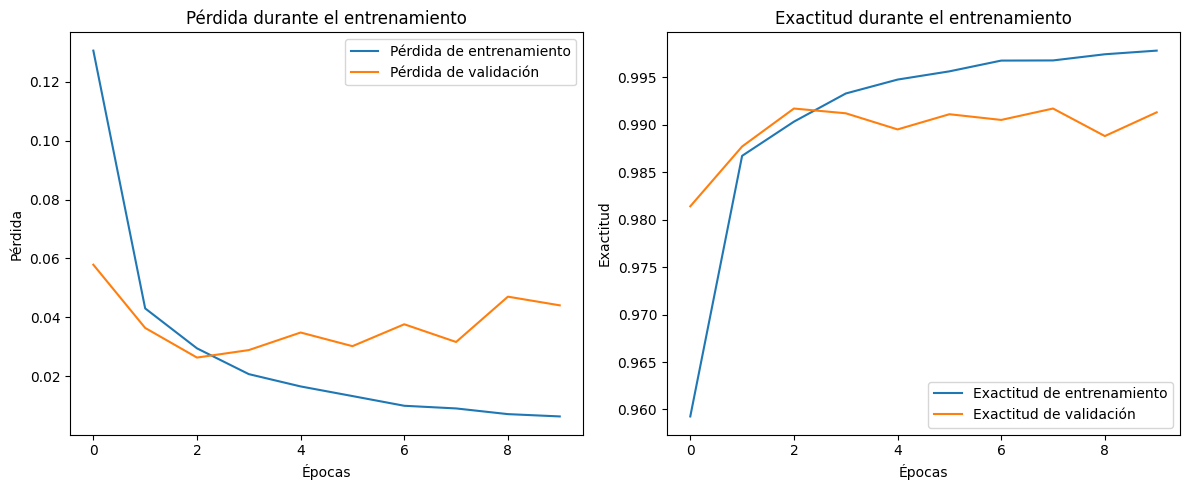

In [ ]:
# MOSTRAR DATOS
test_data = model.evaluate(test_images, y_test)
print("Exactitud:", test_data[1])
print("Perdida:", test_data[0])

# GRAFICAS
plt.figure(figsize=(12, 5))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Exactitud
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Exactitud de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Exactitud de validación')
plt.title('Exactitud durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Exactitud')
plt.legend()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


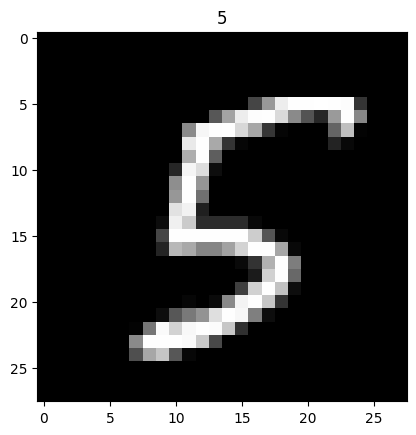

In [ ]:
# EJEMPLOS INDIVIDUALES
plt.imshow(x_test[23].reshape(28, 28), cmap='gray')
pred = model.predict(test_images[23].reshape(1, 28, 28, 1))
plt.title(np.argmax(pred))
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


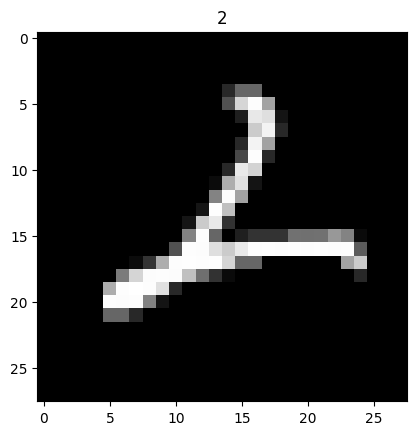

In [ ]:
plt.imshow(x_test[43].reshape(28, 28), cmap='gray')
pred = model.predict(test_images[43].reshape(1, 28, 28, 1))
plt.title(np.argmax(pred))
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


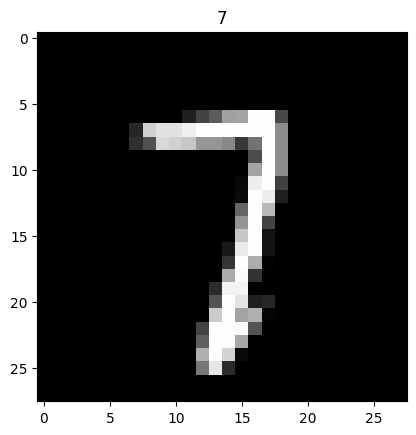

In [ ]:
plt.imshow(x_test[234].reshape(28, 28), cmap='gray')
pred = model.predict(test_images[234].reshape(1, 28, 28, 1))
plt.title(np.argmax(pred))
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


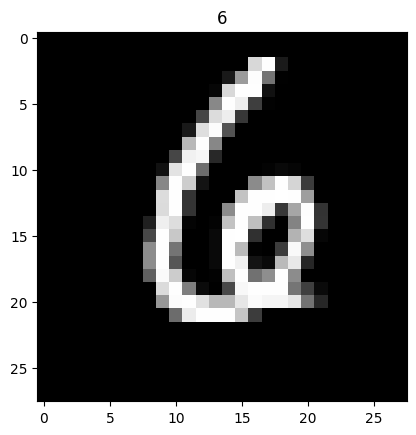

In [ ]:
plt.imshow(x_test[123].reshape(28, 28), cmap='gray')
pred = model.predict(test_images[123].reshape(1, 28, 28, 1))
plt.title(np.argmax(pred))
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


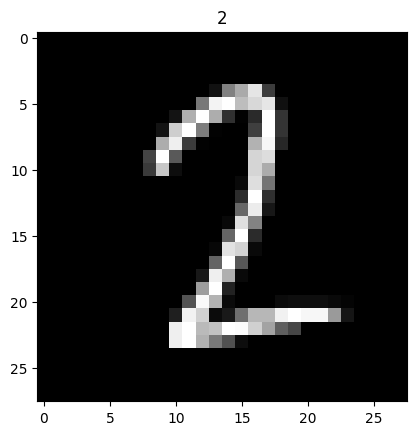

In [ ]:
plt.imshow(x_test[456].reshape(28, 28), cmap='gray')
pred = model.predict(test_images[456].reshape(1, 28, 28, 1))
plt.title(np.argmax(pred))
plt.show()